Problem 1
The file linked below contains a data set of 150 samples. The first column contains a single continuous
feature, X, assumed to have been drawn from an unknown probability density. The second column contains
the binary class label Y .

https://f000.backblazeb2.com/file/jeldridge-data/011-univariate_density_estimation/data.csv

In this problem, use a histogram estimator with bins [0, 1.5), [1.5, 3), . . . , [13.5, 15) to estimate the requested
probabilities. In each part, show your code and provide your reasoning.

a) Estimate P(Y = 1 | X = 6.271) directly

In [2]:
import numpy as np
import pandas as pd

# Load the data
data = pd.read_csv('data.csv', header=None, names=['X', 'Y'])
bin_edges = np.arange(0, 15.1, 1.5)  

# Target value
target_x = 6.271

# Find which bin contains our target value
for i in range(len(bin_edges) - 1):
    if bin_edges[i] <= target_x < bin_edges[i + 1]:
        target_bin_start = bin_edges[i]
        target_bin_end = bin_edges[i + 1]
        break

# Filter data for the target bin
bin_data = data[(data['X'] >= target_bin_start) & (data['X'] < target_bin_end)]

# Count total samples in the bin
bin_total = len(bin_data)

# Count samples with Y = 1 in the bin
bin_class_1 = sum(bin_data['Y'] == 1)

# Calculate the probability P(Y = 1 | X in the target bin)
probability = bin_class_1 / bin_total

# Final answer
print("\nAnswer to part a):")
print(f"P(Y = 1 | X = 6.271) = {probability:.4f}")


Answer to part a):
P(Y = 1 | X = 6.271) = 0.7143


b) Estimate P(Y = 1 | X = 6.271) by estimating all of: 1) the marginal density pX(x), 2) the classconditional density pX(x | Y = 1), and 3) the class prior P(Y = 1), and then applying Bayes’ rule.

In [ ]:
bin_edges = np.arange(0, 15.1, 1.5)
bin_width = 1.5

# Target value
target_x = 6.271

# Find target bin
for i in range(len(bin_edges) - 1):
    if bin_edges[i] <= target_x < bin_edges[i + 1]:
        target_bin_start = bin_edges[i]
        target_bin_end = bin_edges[i + 1]
        break

# Count samples for full data and for Y = 1
total_samples = len(data)
class1_total = data['Y'].sum()  
p_y1 = class1_total / total_samples

# Count samples in the target bin (using the bin width to estimate densities)
in_bin = (data['X'] >= target_bin_start) & (data['X'] < target_bin_end)
bin_total = in_bin.sum()
class1_in_bin = data.loc[in_bin, 'Y'].sum()

# Estimate pX(x) and pX(x|Y=1) in the target bin
p_x = bin_total / (total_samples * bin_width)
p_x_given_y1 = class1_in_bin / (class1_total * bin_width)

# Apply Bayes' rule: P(Y = 1 | X) = [p(X | Y = 1) * P(Y = 1)] / p(X)
p_y1_given_x = (p_x_given_y1 * p_y1) / p_x

print(f"P(Y = 1 | X = {target_x}) = {p_y1_given_x:.4f}")

P(Y = 1 | X = 6.271) = 0.7143


c) For what values of x ∈ [0, 15] will the Bayes classifier predict y = 1?

In [ ]:
bin_edges = np.arange(0, 15.1, 1.5)  
# Calculate class priors
p_y1 = sum(data['Y'] == 1) / len(data)
p_y0 = 1 - p_y1
y1_bins = []
for i in range(len(bin_edges) - 1):
    bin_start, bin_end = bin_edges[i], bin_edges[i+1]
    bin_width = bin_end - bin_start
    class1_in_bin = sum((data['Y'] == 1) & (data['X'] >= bin_start) & (data['X'] < bin_end))
    class0_in_bin = sum((data['Y'] == 0) & (data['X'] >= bin_start) & (data['X'] < bin_end))
    p_x_given_y1 = class1_in_bin / (sum(data['Y'] == 1) * bin_width)
    p_x_given_y0 = class0_in_bin / (sum(data['Y'] == 0) * bin_width)
    posterior_y1 = p_x_given_y1 * p_y1
    posterior_y0 = p_x_given_y0 * p_y0
    prediction = "y=1" if posterior_y1 > posterior_y0 else "y=0"
    print(f"[{bin_start}, {bin_end}) | {posterior_y1:.6f} | {posterior_y0:.6f} | {prediction}")
    if prediction == "y=1":
        y1_bins.append([bin_start, bin_end])
merged_regions = []
if y1_bins:
    merged_regions = [y1_bins[0]]
    for i in range(1, len(y1_bins)):
        if y1_bins[i][0] == merged_regions[-1][1]:
            merged_regions[-1][1] = y1_bins[i][1]
        else:
            merged_regions.append(y1_bins[i])
print("\nSolution: The Bayes classifier predicts y = 1 whenever pX(x | Y = 1)P(Y = 1) > pX(x | Y = 0)P(Y = 0)")

[0.0, 1.5) | 0.035556 | 0.000000 | y=1
[1.5, 3.0) | 0.093333 | 0.000000 | y=1
[3.0, 4.5) | 0.137778 | 0.004444 | y=1
[4.5, 6.0) | 0.106667 | 0.013333 | y=1
[6.0, 7.5) | 0.044444 | 0.017778 | y=1
[7.5, 9.0) | 0.026667 | 0.088889 | y=0
[9.0, 10.5) | 0.000000 | 0.066667 | y=0
[10.5, 12.0) | 0.000000 | 0.031111 | y=0
[12.0, 13.5) | 0.000000 | 0.000000 | y=0
[13.5, 15.0) | 0.000000 | 0.000000 | y=0

Solution: The Bayes classifier predicts y = 1 whenever pX(x | Y = 1)P(Y = 1) > pX(x | Y = 0)P(Y = 0)


The file linked below contains a data set of 150 samples. The first column contains a single continuous
feature, X, assumed to have been drawn from an unknown probability density. The second column contains
the binary class label Y .
https://f000.backblazeb2.com/file/jeldridge-data/011-univariate_density_estimation/data.csv
In the first problem on this homework, you used a histogram estimator to apply the Bayes classification
rule. In this problem, you will instead estimate the class-conditional densities by fitting Gaussians using the
method of maximum likelihood. In each part, show your code and provide your reasoning.
Note: you should not use sklearn, scipy, or any other library to fit the Gaussian densities. You should
instead calculate the maximum likelihood estimates directly (using numpy or pandas to do this is fine).


a) Estimate the class-conditional densities pX(x | Y = 0) and pX(x | Y = 1)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data.csv', header=None, names=['X', 'Y'])
class_0 = data[data['Y'] == 0]['X'].values
class_1 = data[data['Y'] == 1]['X'].values
mean_0 = np.mean(class_0)
variance_0 = np.mean((class_0 - mean_0)**2)  
std_dev_0 = np.sqrt(variance_0)
mean_1 = np.mean(class_1)
variance_1 = np.mean((class_1 - mean_1)**2)  
std_dev_1 = np.sqrt(variance_1)

print("Maximum Likelihood Estimates for Gaussian Distributions:")
print("Class 0 (Y=0):")
print(f"- Mean (μ₀): {mean_0:.6f}")
print(f"- Standard Deviation (σ₀): {std_dev_0:.6f}")
print("\nClass 1 (Y=1):")
print(f"- Mean (μ₁): {mean_1:.6f}")
print(f"- Standard Deviation (σ₁): {std_dev_1:.6f}")

Maximum Likelihood Estimates for Gaussian Distributions:
Class 0 (Y=0):
- Mean (μ₀): 8.764004
- Standard Deviation (σ₀): 1.472857

Class 1 (Y=1):
- Mean (μ₁): 4.131046
- Standard Deviation (σ₁): 1.916531


Let p˜X(x | Y = 0) and p˜X(x | Y = 1) be the estimated class-conditional densities from the previous
part, and let P˜(Y = 1) be the estimate for P(Y = 1).
Plot p˜X(x | Y = 0) · P˜(Y = 0) and p˜X(x | Y = 1) · P˜(Y = 1) on the same axis. Label your plot so that
the grader can tell which Gaussian corresponds to which class. Remember to show your code


Decision boundary at x = 7.0108


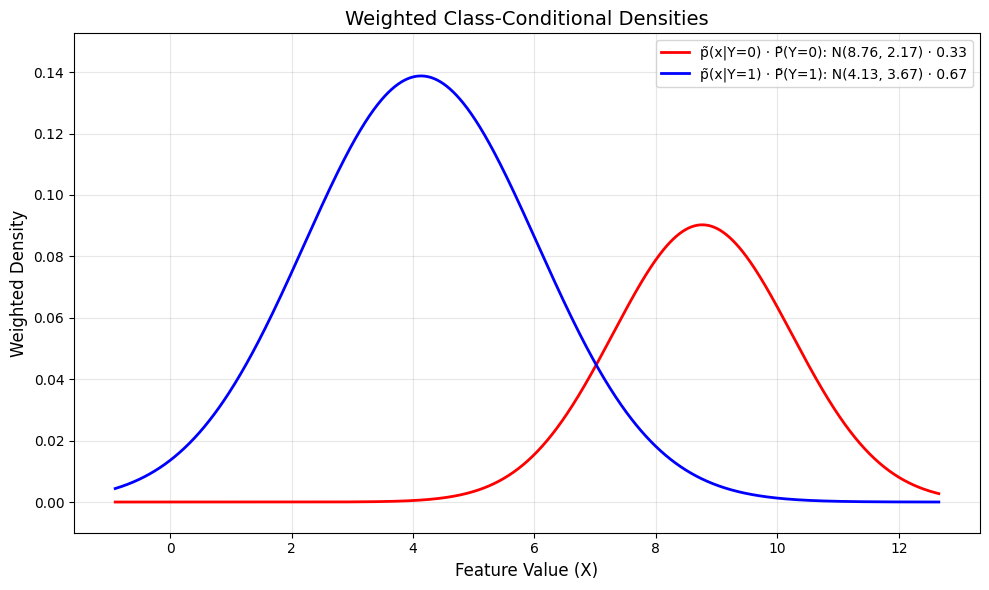

In [35]:
def gaussian_pdf(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean)**2) / (2 * variance))
x_range = np.linspace(min(data['X']) - 1, max(data['X']) + 1, 1000)
weighted_pdf_class_0 = gaussian_pdf(x_range, mean_0, variance_0) * p_y0
weighted_pdf_class_1 = gaussian_pdf(x_range, mean_1, variance_1) * p_y1
diffs = np.abs(weighted_pdf_class_0 - weighted_pdf_class_1)
decision_boundary_idx = np.argmin(diffs)
decision_boundary = x_range[decision_boundary_idx]

print(f"\nDecision boundary at x = {decision_boundary:.4f}")

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(x_range, weighted_pdf_class_0, 'r-', linewidth=2, 
         label=f'p̃(x|Y=0) · P̃(Y=0): N({mean_0:.2f}, {variance_0:.2f}) · {p_y0:.2f}')
plt.plot(x_range, weighted_pdf_class_1, 'b-', linewidth=2, 
         label=f'p̃(x|Y=1) · P̃(Y=1): N({mean_1:.2f}, {variance_1:.2f}) · {p_y1:.2f}')
plt.title('Weighted Class-Conditional Densities', fontsize=14)
plt.xlabel('Feature Value (X)', fontsize=12)
plt.ylabel('Weighted Density', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.ylim(-0.01, max(np.max(weighted_pdf_class_0), np.max(weighted_pdf_class_1)) * 1.1)
plt.tight_layout()

plt.savefig('weighted_densities.png', dpi=300, bbox_inches='tight')
plt.show()

Suppose a new point is observed at x = 6.271. What class does the Bayes classifier predict for x when
the estimated densities and probabilities are used? Remember to show your code, and determine the
predicted class through calculation (and not by visual inspection of the plot from the previous part)

In [ ]:
import numpy as np

# Define the Gaussian PDF function
def gaussian_pdf(x, mean, variance):
    return (1/np.sqrt(2*np.pi*variance)) * np.exp(-0.5*((x-mean)**2)/variance)

new_x = 6.271

# Given parameters
mean_0, variance_0, prior_0 = 8.764004, 2.169309, 1/3  
mean_1, variance_1, prior_1 = 4.131046, 3.673090, 2/3  

# Calculate class-conditional densities p(x|Y=y)
p_x_given_y0 = gaussian_pdf(new_x, mean_0, variance_0)
p_x_given_y1 = gaussian_pdf(new_x, mean_1, variance_1)


print(f"For x = {new_x}:")

For x = 6.271:


The scipy.optimize.fsolve function can be used to find the roots of a function f; that is, the places
where function f(x) = 0. Use fsolve to find the decision boundary for the classifier you trained above.
2
Show your code.
Note that there may actually be multiple decision boundaries at the extremes, but there is one clear
decision boundary in the middle of the data, as should be evident in your plot; find that one.

In [41]:
from scipy.optimize import fsolve
def gaussian_pdf(x, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean)**2) / (2 * variance))
mean_0, variance_0, prior_0 = 8.764004, 2.169309, 1/3
mean_1, variance_1, prior_1 = 4.131046, 3.673090, 2/3
def decision_boundary_function(x):
    """Function that equals zero at the decision boundary."""
    weighted_density_0 = gaussian_pdf(x, mean_0, variance_0) * prior_0
    weighted_density_1 = gaussian_pdf(x, mean_1, variance_1) * prior_1
    return weighted_density_0 - weighted_density_1

initial_guess = (mean_0 + mean_1) / 2
decision_boundary = fsolve(decision_boundary_function, initial_guess)[0]

print(f"Decision boundary: x = {decision_boundary:.6f}")

Decision boundary: x = 7.016711
